# MRI Images StyleTransfer using GAN

### Problem Statement :- 

### To translate the style of one MRI image into another. This will help in gaining a better understanding and analysis of the scanned image. By using GANs, we will create T2 weighted images from T1 weighted MRI images and vice-versa.

MRI T1 and T2 Difference

<table border="1" cellpadding="1" cellspacing="1" align="left">
	<tbody>
		<tr>
			<th>Type</th>
			<th>T1 Highlight Style</th>
			<th>T2 Highlight Style</th>
		</tr>
		<tr>
			<td><b>Water</b></td>
			<td>Dark</td>
			<td>Very Bright</td>
		</tr>
		<tr>
			<td><b>Fat</b></td>
			<td>Very Bright</td>
			<td>Dark</td>
		</tr>
		<tr>
			<td><b>Bone</b></td>
			<td>Dark</td>
			<td>Dark</td>
		</tr>
		<tr>
			<td><b>Muscle</b></td>
			<td>Intermediate</td>
			<td>Dark</td>
		</tr>
		<tr>
			<td><b>Tumours</b></td>
			<td>Intermediate</td>
			<td>Bright</td>
		</tr>
	</tbody>
</table>

<p>&nbsp;</p>


<p align="left">Example of MRI T1 to T2 Transition Image </p>
<img src="T1_to_T2_ImageTransition.png" align="left"/>

### Pipeline
The Sequence of the Project

1. Importing Libraries
2. Data Loading and Visualization
3. Data Preprocessing
4. Model Building
5. Model Training
6. Generating a GIF

### 1. Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio, os, glob
import cv2
import random as rn

from skimage.transform import resize
from tensorflow.keras.utils import plot_model

In [2]:
# set seed values 
np.random.seed(30)
rn.seed(30)
tf.random.set_seed(30)
seed = 30

# set batch size for image processing
BATCH_SIZE = 1024

### 2. Data Loading and Visualization

In [3]:
# Setting Images path and getting image names
T1_image_path = 'D:\\UpGrad_Notes\\capstone\\StyleTransterUsingGAN\\MRI+T1_T2+Dataset\\Tr1\\TrainT1\\'
T2_image_path = 'D:\\UpGrad_Notes\\capstone\\StyleTransterUsingGAN\\MRI+T1_T2+Dataset\\Tr2\\TrainT2\\'

T1_image_names = os.listdir(T1_image_path)
T2_image_names = os.listdir(T2_image_path)

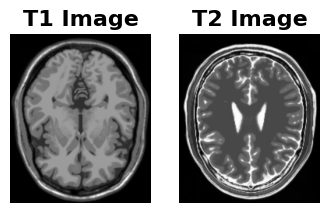

In [4]:
# printing a sample image
img_T1 = cv2.imread(T1_image_path+T1_image_names[0])
img_T2 = cv2.imread(T2_image_path+T2_image_names[0])

plt.figure(figsize=(4,6))
plt.subplot(1, 2, 1)
plt.title('T1 Image', fontsize=16, fontweight='bold')
plt.axis('off')
plt.imshow(img_T1, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('T2 Image', fontsize=16, fontweight='bold')
plt.axis('off')
plt.imshow(img_T2, cmap='gray')

plt.show()

### 3. Data Preprocessing

In [5]:
 # Normalizing, resizing and loading the images

T1_data = np.zeros((len(T1_image_names), 128, 128, 3))
T2_data = np.zeros((len(T2_image_names), 128, 128, 3))

for index, img in enumerate(T1_image_names):
    imgT1 = cv2.imread(T1_image_path+img)
    imgT1 = cv2.cvtColor(imgT1, cv2.COLOR_BGR2RGB)
    imgT1 = (imgT1/127.5)-1.0                           # Normalize the image to [-1.0, 1.0]
    T1_data[index, :, :, :] = resize(imgT1, (128, 128)) # resizing the image
    
for index, img in enumerate(T2_image_names):
    imgT2 = cv2.imread(T2_image_path+img)
    imgT2 = cv2.cvtColor(imgT2, cv2.COLOR_BGR2RGB)
    imgT2 = (imgT2/127.5)-1.0                            # Normalize the image to [-1.0, 1.0]
    T2_data[index, :, :, :] = resize(imgT2, (128, 128))  # resizing the image

# changing dtype to float32
T1_data = T1_data.astype('float32')
T2_data = T2_data.astype('float32')

print(f'T1 shape: {T1_data.shape}')
print(f'T2 shape: {T2_data.shape}')

T1 shape: (43, 128, 128, 3)
T2 shape: (46, 128, 128, 3)


In [6]:
# checking normalized sample
T1_data[1,:,:,:]

array([[[-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        ...,
        [-1.        , -1.        , -1.        ],
        [-0.99998397, -0.99998397, -0.99998397],
        [-0.993772  , -0.993772  , -0.993772  ]],

       [[-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        ...,
        [-1.        , -1.        , -1.        ],
        [-0.9970742 , -0.9970742 , -0.9970742 ],
        [-0.992182  , -0.992182  , -0.992182  ]],

       [[-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        ...,
        [-1.        , -1.        , -1.        ],
        [-0.9992003 , -0.9992003 , -0.9992003 ],
        [-0.9933438 , -0.9933438 , -0.9933438 ]],

       ...,

       [[-0.99215686, -0.99215686, -0.99215686],
        [-0

In [7]:
# creating batch and shuffling data

T1_data_batch = tf.data.Dataset.from_tensor_slices(T1_data).shuffle(T1_data.shape[0], seed=seed).batch(BATCH_SIZE)
T2_data_batch = tf.data.Dataset.from_tensor_slices(T2_data).shuffle(T2_data.shape[0], seed=seed).batch(BATCH_SIZE)

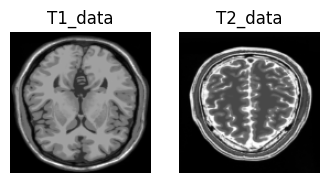

In [8]:
# visualizing a sample

sample_T1_data = next(iter(T1_data_batch))
sample_T2_data = next(iter(T2_data_batch))

plt.figure(figsize=(4, 6))
plt.subplot(1,2,1)
plt.imshow(sample_T1_data[0, :, :, 0], cmap='gray')
plt.title('T1_data')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sample_T2_data[0, :, :, 0], cmap='gray')
plt.title('T2_data')
plt.axis('off')
plt.show()

### 4. Model Building

#### Building generator and discriminator

In [9]:
# Instance Normalization
class InstanceNormalization(tf.keras.layers.Layer):
    # Initialization of Objects
    def __init__(self, epsilon=1e-5):
        # calling parent's init
        super(InstanceNormalization, self).__init__()
        self.epsilon = epsilon
    
    def build(self, input_shape):
        self.scale = self.add_weight(
            name='scale',
            shape=input_shape[-1:],
            initializer=tf.random_normal_initializer(1., 0.02),
            trainable=True)
        self.offset = self.add_weight(
            name='offset',
            shape=input_shape[-1:],
            initializer='zeros',
            trainable=True)
    
    def call(self, x):
        # Compute Mean and Variance, Axes=[1,2] ensures Instance Normalization
        mean, variance = tf.nn.moments(x, axes=[1, 2], keepdims=True)
        inv = tf.math.rsqrt(variance + self.epsilon)
        normalized = (x - mean) * inv
        return self.scale * normalized + self.offset

In [10]:
# Downsampling is performed using the Convolution, leading to reduce in dimensions.
def Downsampling(filters, size, apply_norm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    # Add Conv2d layer
    result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                                      kernel_initializer=initializer, use_bias=False))
    # Add Normalization layer
    if apply_norm:
        result.add(InstanceNormalization())
    # Add Leaky Relu Activation
    result.add(tf.keras.layers.LeakyReLU())
    return result

In [11]:
# Upsampling is a result of Transposed Convolution, where dimension of image are increased.
def Upsampling(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    # Add Transposed Conv2d layer
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                                               kernel_initializer=initializer, use_bias=False))
    # Add Normalization Layer
    result.add(InstanceNormalization())
    # Conditionally add Dropout layer
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))
    # Add Relu Activation Layer
    result.add(tf.keras.layers.ReLU())
    return result

In [12]:
# Unet Generator is a combination of Convolution + Transposed Convolution Layers
def Unet_Generator():
    down_stack = [
        Downsampling(64, 4, False), # (bs, 64, 64, 64)
        Downsampling(128, 4), # (bs, 32, 32, 128)
        Downsampling(128, 4), # (bs, 16, 16, 128)
        Downsampling(128, 4), # (bs, 8, 8, 128)
        Downsampling(128, 4), # (bs, 4, 4, 128)
        Downsampling(128, 4), # (bs, 2, 2, 128)
        Downsampling(128, 4) # (bs, 1, 1, 128)
    ]
    up_stack = [
        Upsampling(128, 4, True), # (bs, 2, 2, 256)
        Upsampling(128, 4, True), # (bs, 4, 4, 256)
        Upsampling(128, 4, True), # (bs, 8, 8, 256)
        Upsampling(128, 4, True), # (bs, 16, 16, 256)
        Upsampling(128, 4), # (bs, 32, 32, 256)
        Upsampling(64, 4) # (bs, 64, 64, 64)
    ]
    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(3, 4, strides=2, padding='same', kernel_initializer=initializer,
                                           activation='tanh') # (bs, 128, 128, 3)
    concat = tf.keras.layers.Concatenate()
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs
    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
    
    skips = reversed(skips[:-1])
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = concat([x, skip])
    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

In [13]:
# Initializing generator T1_T2/ T2_T1
generator_T1_T2 = Unet_Generator()
generator_T2_T1 = Unet_Generator()

In [14]:
generator_T2_T1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_13 (Sequential)     (None, 64, 64, 64)   3072        ['input_2[0][0]']                
                                                                                                  
 sequential_14 (Sequential)     (None, 32, 32, 128)  131328      ['sequential_13[0][0]']          
                                                                                                  
 sequential_15 (Sequential)     (None, 16, 16, 128)  262400      ['sequential_14[0][0]']    

In [15]:
# Discriminators only contain Convolutional Layers and no Transposed Convolution is not used 
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    # add input layer of size (128, 128, 3)
    inp = tf.keras.layers.Input(shape=[128, 128, 3], name='input_image')
    x = inp
    
    # add downsampling step here
    down1 = Downsampling(64, 4, False)(x) # (bs, 64, 64, 64)
    down2 = Downsampling(128, 4)(down1) # (bs, 32, 32, 128)
    down3 = Downsampling(128, 4)(down2)
    down4 = Downsampling(128, 4)(down3)
    # add a padding layer here
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down4) # (bs, 10, 10, 128)
    
    # implement a concrete downsampling layer here
    conv = tf.keras.layers.Conv2D(256, 4, strides=1, kernel_initializer=initializer,
                                  use_bias=False)(zero_pad1) # (bs, 7, 7, 256)
    norm1 = InstanceNormalization()(conv)
    leaky_relu = tf.keras.layers.LeakyReLU()(norm1)
    
    # apply zero padding layer
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 9, 9, 256)
    
    # add a last pure 2D Convolution layer
    last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2) # (bs, 6, 6, 1)
    return tf.keras.Model(inputs=inp, outputs=last)

In [16]:
discriminator_x = Discriminator()
discriminator_y = Discriminator()


In [17]:
discriminator_x.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 sequential_26 (Sequential)  (None, 64, 64, 64)        3072      
                                                                 
 sequential_27 (Sequential)  (None, 32, 32, 128)       131328    
                                                                 
 sequential_28 (Sequential)  (None, 16, 16, 128)       262400    
                                                                 
 sequential_29 (Sequential)  (None, 8, 8, 128)         262400    
                                                                 
 zero_padding2d (ZeroPadding  (None, 10, 10, 128)      0         
 2D)                                                             
                                                           

<Figure size 400x400 with 0 Axes>

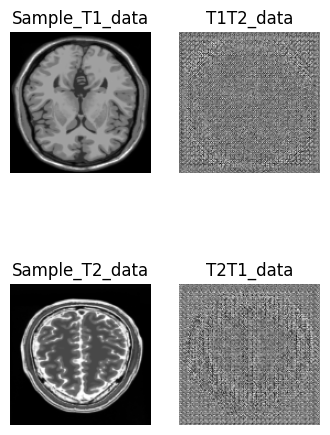

In [18]:
# untrained generator images check

T1T2_data = generator_T1_T2(sample_T1_data)
T2T1_data = generator_T2_T1(sample_T2_data)
plt.figure(figsize=(4, 4))

imgs = [sample_T1_data, T1T2_data, sample_T2_data, T2T1_data]
title = ['Sample_T1_data', 'T1T2_data', 'Sample_T2_data', 'T2T1_data']

plt.figure(figsize=(4,6))
for i in range(len(imgs)):
    plt.subplot(2, 2, i+1)
    plt.title(title[i])
    plt.imshow(imgs[i][0].numpy()[:, :, 0], cmap='gray')
    plt.axis('off')
plt.show()

#### Loss functions

In [19]:
# setting loss functions

loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def Discriminator_Loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss * 0.5 # mean of losses

def Generator_Loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

def Calc_cycle_Loss(real_image, cycled_image):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return 10.0 * loss1

def Identity_Loss(real_image, same_image):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return 0.5*loss

#### Optimizer

In [20]:
EPOCHS = 500

generator_T1_T2_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_T2_T1_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

#### Checkpoint Initialization

In [21]:
checkpoint_path = "D:\\UpGrad_Notes\\capstone\\Git\\jagdishj\\checkpoint"

ckpt = tf.train.Checkpoint(generator_T1_T2=generator_T1_T2,
                           generator_T2_T1=generator_T2_T1,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_T1_T2_optimizer=generator_T1_T2_optimizer,
                           generator_T2_T1_optimizer=generator_T2_T1_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [22]:
# Function to show Images output by Generators while Training
def generate_images(model1, test_input1, model2, test_input2):
    prediction1 = model1(test_input1)
    prediction2 = model2(test_input2)
    plt.figure(figsize=(6, 6))
    display_list = [test_input1[0], prediction1[0], test_input2[0], prediction2[0]]
    title = ['Input Image', 'Predicted Image', 'Input Image', 'Predicted Image']
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.title(title[i],fontsize =8)
        plt.imshow(display_list[i].numpy()[:, :, 0], cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

#### Training flow

In [23]:
@tf.function
def train_step(real_x, real_y):
    # persistent is set to True because the tape is used more than
    # once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X
        fake_y = generator_T1_T2(real_x, training=True)
        fake_x = generator_T2_T1(real_y, training=True)
      
        cycled_y = generator_T1_T2(fake_x, training=True)
        cycled_x = generator_T2_T1(fake_y, training=True)
        
        # same_x and same_y are used for identity loss.
        same_x = generator_T2_T1(real_x, training=True)
        same_y = generator_T1_T2(real_y, training=True)
        
        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)
        
        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)
        
        # calculate the loss
        gen_T1_T2_loss = Generator_Loss(disc_fake_y)
        gen_T2_T1_loss = Generator_Loss(disc_fake_x)
        
        total_cycle_loss = Calc_cycle_Loss(real_x, cycled_x) + Calc_cycle_Loss(real_y, cycled_y)
        
        # Total generator loss = BCE loss + cycle loss + identity loss
        total_gen_T1_T2_loss = gen_T1_T2_loss + total_cycle_loss + Identity_Loss(real_y, same_y)
        total_gen_T2_T1_loss = gen_T2_T1_loss + total_cycle_loss + Identity_Loss(real_x, same_x)
        
        # Discriminator's loss
        disc_x_loss = Discriminator_Loss(disc_real_x, disc_fake_x)
        disc_y_loss = Discriminator_Loss(disc_real_y, disc_fake_y)
        
    # Calculate the gradients for generator and discriminator
    generator_T1_T2_gradients = tape.gradient(total_gen_T1_T2_loss, generator_T1_T2.trainable_variables)
    generator_T2_T1_gradients = tape.gradient(total_gen_T2_T1_loss, generator_T2_T1.trainable_variables)
    
    discriminator_x_gradients = tape.gradient(disc_x_loss, discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, discriminator_y.trainable_variables)
    
    # Apply the gradients to the optimizer
    generator_T1_T2_optimizer.apply_gradients(zip(generator_T1_T2_gradients, generator_T1_T2.trainable_variables))
    generator_T2_T1_optimizer.apply_gradients(zip(generator_T2_T1_gradients, generator_T2_T1.trainable_variables))
    
    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients, discriminator_x.trainable_variables))
    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients, discriminator_y.trainable_variables))

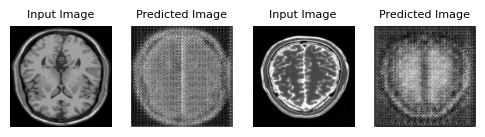

Saving checkpoint for epoch 1 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-40


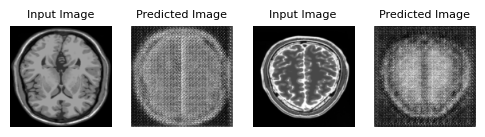

Saving checkpoint for epoch 2 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-41


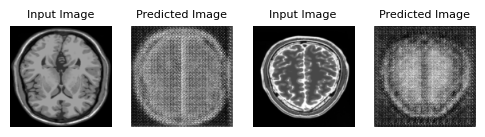

Saving checkpoint for epoch 3 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-42


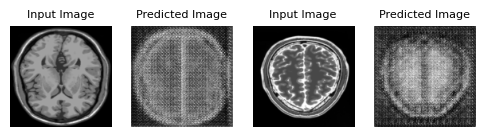

Saving checkpoint for epoch 4 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-43


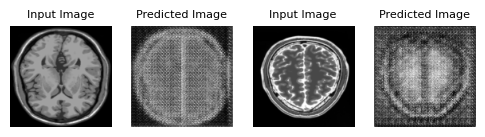

Saving checkpoint for epoch 5 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-44


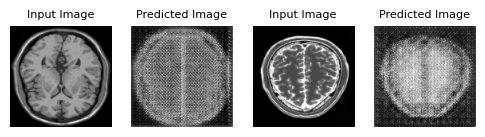

Saving checkpoint for epoch 6 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-45


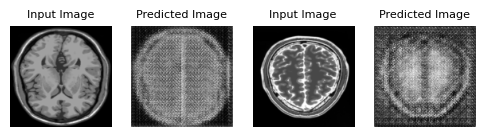

Saving checkpoint for epoch 7 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-46


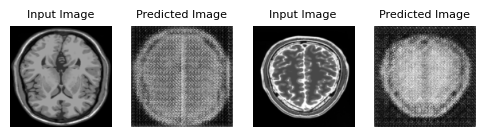

Saving checkpoint for epoch 8 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-47


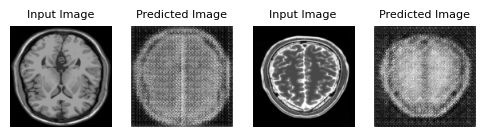

Saving checkpoint for epoch 9 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-48


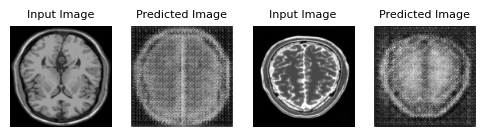

Saving checkpoint for epoch 10 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-49


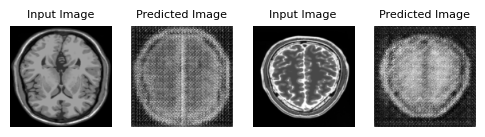

Saving checkpoint for epoch 11 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-50


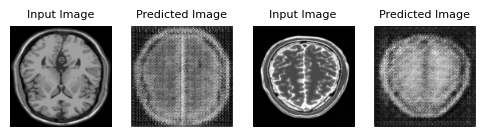

Saving checkpoint for epoch 12 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-51


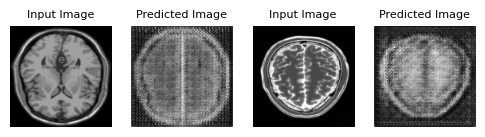

Saving checkpoint for epoch 13 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-52


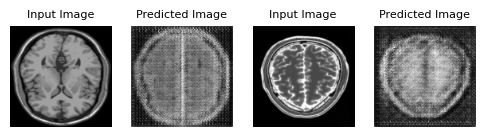

Saving checkpoint for epoch 14 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-53


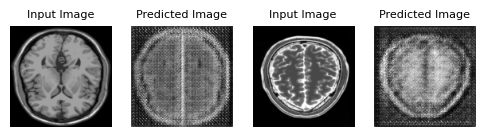

Saving checkpoint for epoch 15 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-54


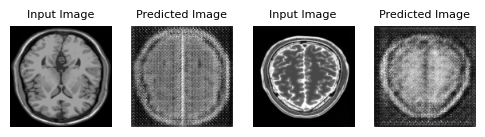

Saving checkpoint for epoch 16 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-55


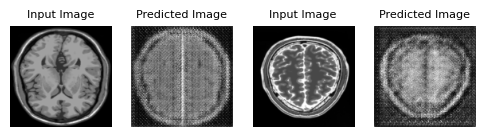

Saving checkpoint for epoch 17 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-56


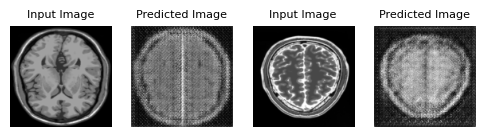

Saving checkpoint for epoch 18 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-57


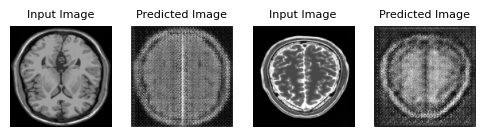

Saving checkpoint for epoch 19 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-58


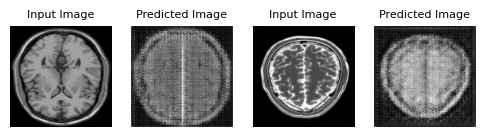

Saving checkpoint for epoch 20 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-59


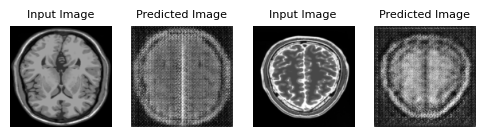

Saving checkpoint for epoch 21 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-60


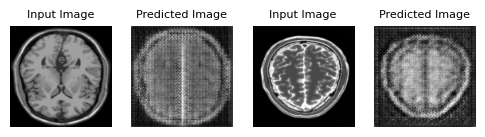

Saving checkpoint for epoch 22 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-61


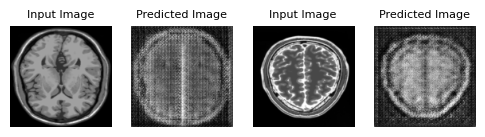

Saving checkpoint for epoch 23 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-62


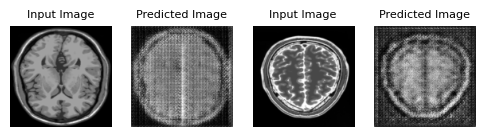

Saving checkpoint for epoch 24 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-63


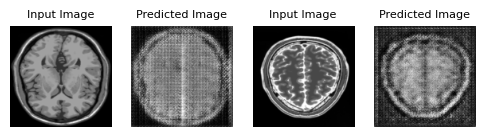

Saving checkpoint for epoch 25 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-64


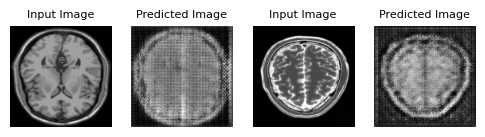

Saving checkpoint for epoch 26 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-65


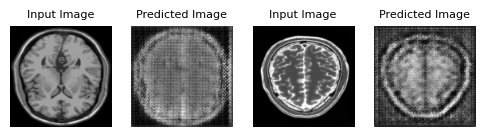

Saving checkpoint for epoch 27 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-66


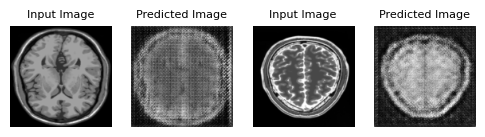

Saving checkpoint for epoch 28 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-67


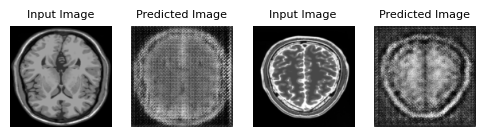

Saving checkpoint for epoch 29 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-68


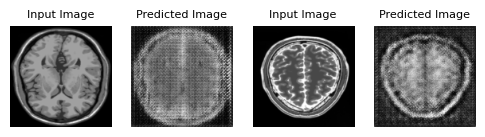

Saving checkpoint for epoch 30 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-69


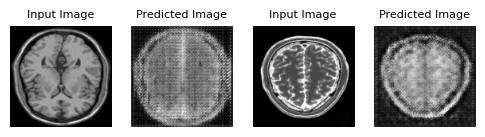

Saving checkpoint for epoch 31 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-70


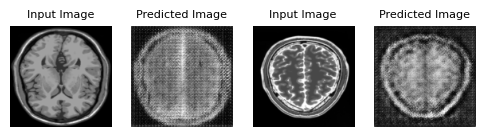

Saving checkpoint for epoch 32 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-71


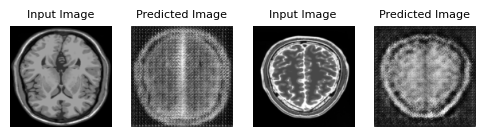

Saving checkpoint for epoch 33 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-72


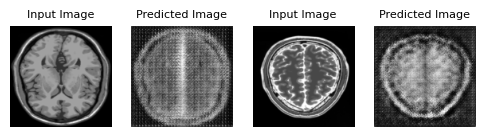

Saving checkpoint for epoch 34 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-73


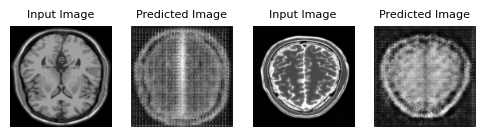

Saving checkpoint for epoch 35 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-74


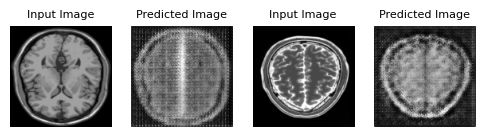

Saving checkpoint for epoch 36 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-75


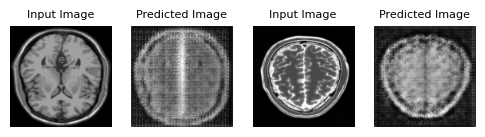

Saving checkpoint for epoch 37 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-76


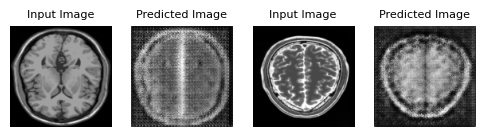

Saving checkpoint for epoch 38 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-77


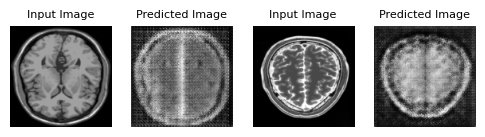

Saving checkpoint for epoch 39 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-78


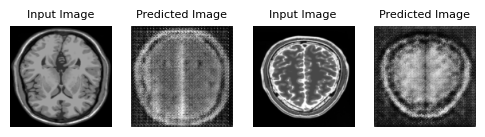

Saving checkpoint for epoch 40 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-79


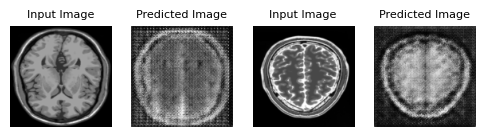

Saving checkpoint for epoch 41 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-80


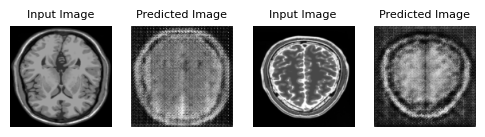

Saving checkpoint for epoch 42 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-81


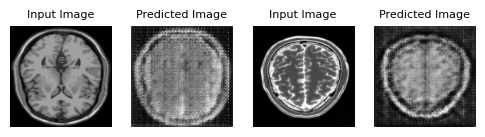

Saving checkpoint for epoch 43 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-82


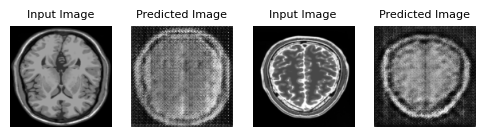

Saving checkpoint for epoch 44 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-83


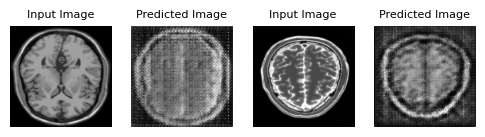

Saving checkpoint for epoch 45 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-84


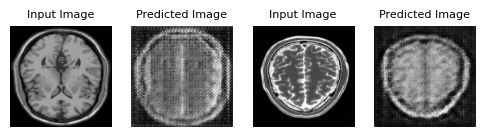

Saving checkpoint for epoch 46 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-85


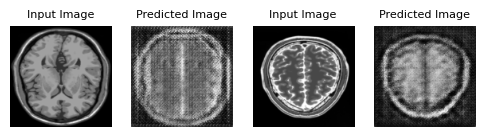

Saving checkpoint for epoch 47 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-86


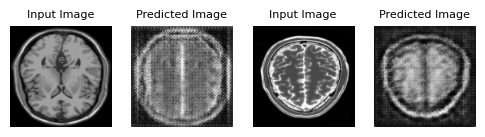

Saving checkpoint for epoch 48 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-87


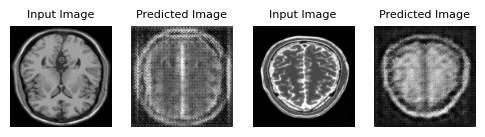

Saving checkpoint for epoch 49 at D:\UpGrad_Notes\capstone\Git\jagdishj\checkpoint\ckpt-88


KeyboardInterrupt: 

In [24]:
# Training the model

for epoch in range(1, EPOCHS+1):
    for image_x, image_y in tf.data.Dataset.zip((T1_data_batch, T2_data_batch)):
        train_step(image_x, image_y)
    generate_images(generator_T1_T2, sample_T1_data, generator_T2_T1, sample_T2_data)
    ckpt_save_path = ckpt_manager.save()
    print('Saving checkpoint for epoch', epoch, 'at', ckpt_save_path)

In [ ]:
# creating animation for displaying per epoch changes
anim_file = 'cyclegan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
# displaying gif animation using tensorflow docs
!pip install -q git+https://github.com/tensorflow/docs 

In [ ]:
# displaying gif animation using tensorflow docs
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)